In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

file_path = '/content/drive/MyDrive/Columbia/Classes/3_Junior_Year/Spring_Sem/Applied_Machine_Learning/Projects/Project_2/big_tweets.csv'

for encoding in ['latin1', 'ISO-8859-1', 'cp1252']:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"Success with {encoding}")
        break
    except:
        continue

print(df.head())

Success with latin1
   0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY _TheSpecialOne_  \
0  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   scotthamilton   
1  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY        mattycus   
2  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         ElleCTF   
3  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          Karoli   
4  0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY        joy_wolf   

  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
0  is upset that he can't update his Facebook by ...                                                                   
1  @Kenichan I dived many times for the ball. Man...                                                                   
2    my whole body feels itchy and like its on fire                                                                    
3  @nationwideclass no, it's not behaving a

In [5]:
df.shape

(1599999, 6)

In [6]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [7]:
# Define correct column names
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

# Assign the new column names
df.columns = column_names

# Verify
print(df.head())

   target          id                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1599999 non-null  int64 
 1   id      1599999 non-null  int64 
 2   date    1599999 non-null  object
 3   flag    1599999 non-null  object
 4   user    1599999 non-null  object
 5   text    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [39]:
df.describe() #not useful

,target,id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
#get all hashtags, filter by commonality
import re
from collections import Counter

def get_hashtag_frequencies(df, text_col='text', top_n=None):
    # Extract all hashtags using regex
    hashtags = df[text_col].str.findall(r'#(\w+)').explode()

    # Count occurrences and sort
    hashtag_counts = Counter(hashtags.dropna())
    sorted_hashtags = dict(hashtag_counts.most_common(top_n))

    return sorted_hashtags

# Usage example:
hashtag_counts = get_hashtag_frequencies(df)
print(hashtag_counts)

{'followfriday': 2114, 'fb': 1747, 'squarespace': 888, 'FF': 586, '1': 519, 'seb': 499, 'FollowFriday': 463, 'musicmonday': 405, 'ff': 399, 'iranelection': 359, '2': 341, 'fail': 301, 'BSB': 299, 'myweakness': 269, 'iremember': 268, 'asot400': 264, 'marsiscoming': 248, 'mcflyforgermany': 230, 'andyhurleyday': 188, 'iPhone': 185, 'inaperfectworld': 183, 'f1': 168, 'haveyouever': 168, 'delongeday': 167, 'spymaster': 160, 'trackle': 159, 'tcot': 155, 'mileymonday': 155, 'bgt': 153, 'e3': 133, 'iphone': 130, 'shaunjumpnow': 127, '3': 126, 'E3': 124, 'IranElection': 119, 'goodsex': 114, 'bradiewebb': 106, 'hhrs': 105, 'clothdiapers': 105, 'dontyouhate': 103, 'mmwanted': 98, '140conf': 96, 'flylady': 95, 'andyclemmensen': 95, 'asylm': 95, 'tag': 93, 'shaundiviney': 93, 'BGT': 92, 'F1': 90, 'chesterday': 90, 'hoppusday': 89, 'eu09': 85, 'twitter': 82, 'chuckmemondays': 81, '3hotwords': 75, '4': 74, 'peterfacinelli': 74, 'shortstack': 73, 'happybdaykrisallen': 71, 'ASOT400': 69, 'zenjar': 68, 

In [9]:
#don't want to double count
def deduplicate_tweets(df):
  return df.drop_duplicates(subset='text')

new_df = deduplicate_tweets(df)
print(new_df.shape)

(1581465, 6)


In [10]:
#said there were none earlier but just making sure
def drop_nulls(df):
  return df.dropna(subset=['text'])

new_df = drop_nulls(new_df)
print(new_df.shape)

(1581465, 6)


In [33]:
#when are these tweets from?
def date_range(df, date_col='date'):
  df[date_col] = pd.to_datetime(df[date_col])

  earliest_date = df[date_col].min()
  latest_date = df[date_col].max()

  return earliest_date, latest_date

earliest_date, latest_date = date_range(new_df)
print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")

<ipython-input-33-02785a001c00>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df[date_col] = pd.to_datetime(df[date_col])


Earliest date: 2009-04-06 22:19:49
Latest date: 2009-06-25 10:28:31


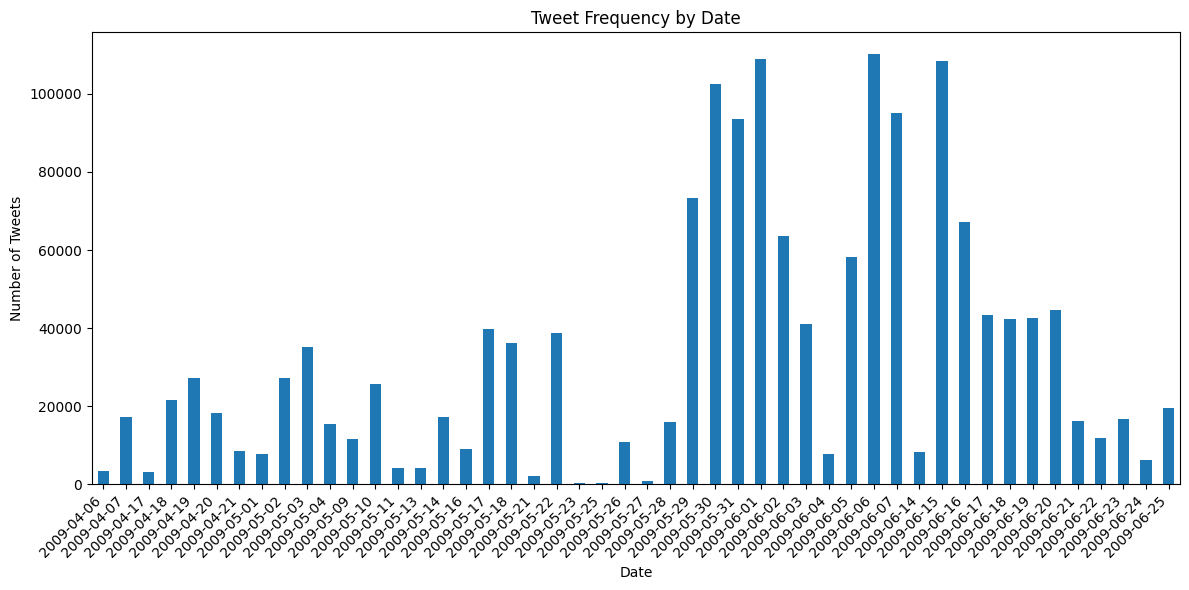

In [47]:
def date_distribution(df, target_col='target'):
  '''
  function that makes a bar chart of tweets based on the day they were tweeted,
   starting at the earliest date and ending at the latest date.
   INPUT: a dataframe
   OUTPUT: a bar chart of tweets based on the day they were tweeted
  '''
  #Convert to datetime if it's not already
  df[target_col] = pd.to_datetime(df[target_col], errors='coerce')

  # Drop NaT values that couldn't be converted
  df = df.dropna(subset=[target_col])

  # Extract date only
  df['date_only'] = df[target_col].dt.date

  # Count tweets per day
  tweet_counts = df['date_only'].value_counts().sort_index()

  # Plot
  plt.figure(figsize=(12, 6))
  tweet_counts.plot(kind='bar')
  plt.title("Tweet Frequency by Date")
  plt.xlabel("Date")
  plt.ylabel("Number of Tweets")
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

date_distribution(new_df, 'date')

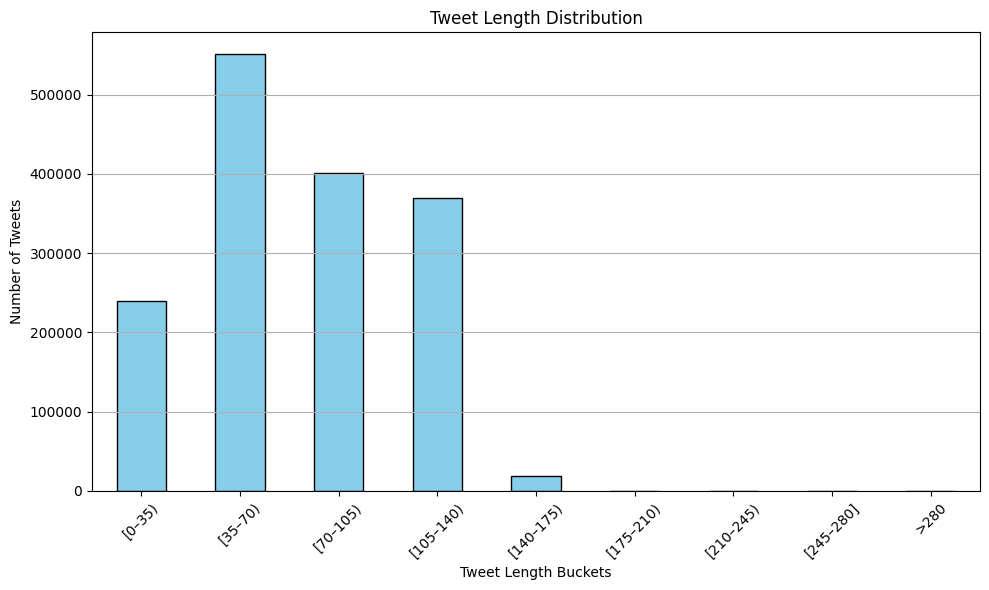

,text,tweet_length,length_bucket
0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111,[105–140)
1,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89,[70–105)
2,my whole body feels itchy and like its on fire,47,[35–70)
3,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111,[105–140)
4,@Kwesidei not the whole crew,29,[0–35)


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

#let's see the length distribution (make sure there aren't lots of short, spam tweets)
def length_based_distribution(df):
    # Create a new column for tweet lengths
    df['tweet_length'] = df['text'].apply(len)

    # Define bins and labels (tweets are up to 280 chars i believe)
    bins = [0, 35, 70, 105, 140, 175, 210, 245, 280, float('inf')]
    labels = ['[0–35)', '[35–70)', '[70–105)', '[105–140)', '[140–175)', '[175–210)', '[210–245)', '[245–280]', '>280']

    # Assign bins
    df['length_bucket'] = pd.cut(df['tweet_length'], bins=bins, labels=labels, right=False)

    # Count tweets in each bucket
    bucket_counts = df['length_bucket'].value_counts().sort_index()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    bucket_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Tweet Length Distribution")
    plt.xlabel("Tweet Length Buckets")
    plt.ylabel("Number of Tweets")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    return df[['text', 'tweet_length', 'length_bucket']].head()


length_based_distribution(new_df)

In [37]:
#how many tweeters are there?
def unique_users(df):
  return df['user'].nunique()

unique_users(new_df)

654131

In [48]:
#most prolific users by tweat count

def prolific_tweeters(df):

  return df['user'].value_counts().head(10)

prolific_tweeters(new_df)

,count
user,
lost_dog,549
webwoke,341
SallytheShizzle,281
VioletsCRUK,279
mcraddictal,274
tsarnick,248
what_bugs_u,246
Karen230683,237
DarkPiano,234


In [41]:
import re

#define and validate political regex (region of interest)
p_pattern = r"""
\b(politi(cs|cal|cians?)|
govern(ment|ance|ing)|
(democrat|republican)(s|ic)?|
congress|senat(e|or)|representative|
elect(ion|oral)|campaign|
policy|policies|
liberal(s|ism)?|conservative(s|ism)?|
left-wing|right-wing|
partisan|bipartisan|
federal|state|local\s?government|
legislat(ure|ion)|bill|lawmaking|
vote|voting|ballot|
lobby(ing|ists?)|
white\s?house|capitol|
politico|the\s?hill|
#(politics|election|vote|democrat|gop))\b
"""
p_pattern = re.sub(r"\s+", "", p_pattern)  # Optional: remove whitespace if needed

re.compile(p_pattern)  # Raises error if malformed

re.compile(r'\b(politi(cs|cal|cians?)|govern(ment|ance|ing)|(democrat|republican)(s|ic)?|congress|senat(e|or)|representative|elect(ion|oral)|campaign|policy|policies|liberal(s|ism)?|conservative(s|ism)?|left-wing|right-wing|partisan|bipartisan|federal|state|local\s?government|legislat(ure|ion)|bill|lawmaking|vote|voting|ballot|lobby(ing|ists?)|white\s?house|capitol|politico|the\s?hill|#(politics|election|vote|democrat|gop))\b',
re.UNICODE)

In [42]:
#let's see if this tweet data has stuff we'd be interested in in it?
def get_pattern_tweets(df, pattern, text_col='text'):

    # Find matching tweets
    mask = df[text_col].str.contains(pattern, case=False, regex=True, na=False)
    pattern_tweets = df[mask].copy()

    return pattern_tweets

# Usage:
pattern_tweets = get_pattern_tweets(df,p_pattern)
print(f"Found {len(pattern_tweets)} political tweets")
display(pattern_tweets.head())

<ipython-input-42-a18fb7558ba5>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df[text_col].str.contains(pattern, case=False, regex=True, na=False)


Found 7215 political tweets


,target,id,date,flag,user,text
64,0,1467824199,Mon Apr 06 22:23:15 PDT 2009,NO_QUERY,adri_mane,@Starrbby too bad I won't be around I lost my job and can't even pay my phone bill lmao aw shucks
184,0,1467858869,Mon Apr 06 22:32:20 PDT 2009,NO_QUERY,Jaderade14,is watching the hill . . .and its making me sad
332,0,1467896211,Mon Apr 06 22:42:18 PDT 2009,NO_QUERY,summerseelye,michigan state you make me sad
337,0,1467896898,Mon Apr 06 22:42:30 PDT 2009,NO_QUERY,alohasassy,just got home from watching Michigan State get tromped!
444,0,1467926153,Mon Apr 06 22:50:43 PDT 2009,NO_QUERY,IGetsBusy514,@EazyDoesIt87 NEGATIVE.. you lost my vote of confidence


In [43]:
#let's do some manual validation (make sure we're not just getting random stuff)

#adjust display options
pd.set_option('display.max_rows', 50)            # Show 50 rows
pd.set_option('display.max_colwidth', None)      # Show full text in each column (no truncation)

# Then display
display(pattern_tweets['text'].head(50))       # Show first 50 tweets

,text
64,@Starrbby too bad I won't be around I lost my job and can't even pay my phone bill lmao aw shucks
184,is watching the hill . . .and its making me sad
332,michigan state you make me sad
337,just got home from watching Michigan State get tromped!
444,@EazyDoesIt87 NEGATIVE.. you lost my vote of confidence
517,Such a tough game to watch tonight for State Finally going to bed after also staying up to watch the season premiere of the Hills!
646,"@Honey3223 I did get some disgruntled people when I wrote my ESN, but the 1000 hits in one day made up for it. Bill pulls in 250 tops"
812,What? Apparently it's 52 degress at 11pm in Washington State. I miss winter already
957,"Gah, Comcast doubled our cable/internet bill w/out telling us, so we are quitting. Can anyone suggest an affordable company in bay area?"
976,@adame ruddy money!! i like it!! still waiting here.... oh what a surprise... by state too?? hmmm....... seriously!!


In [52]:
new_df.head()

,target,id,date,flag,user,text,tweet_length,length_bucket
0,1970-01-01,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,111,[105–140)
1,1970-01-01,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,89,[70–105)
2,1970-01-01,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,[35–70)
3,1970-01-01,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",111,[105–140)
4,1970-01-01,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,29,[0–35)


In [54]:
final_df = new_df.drop(columns=["length_bucket", "tweet_length"])
final_df.head()

,target,id,date,flag,user,text
0,1970-01-01,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,1970-01-01,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,1970-01-01,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,1970-01-01,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,1970-01-01,1467811372,2009-04-06 22:20:00,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [56]:
#write processed data to a new csv:
processed_data = final_df.to_csv('processed_tweets.csv', index=False)